# Получение распределений для двухатомной системы He-Ar

In [1]:
%matplotlib notebook

from IPython.display import Math
import matplotlib.pyplot as plt

def read_file( filename, n ):
    with open( filename, mode = 'r' ) as inputfile:
        lines = inputfile.readlines()

    lists = [ [] for _ in range(n) ]

    for line in lines:
        if len(line) > 0:
            data = line.split()
            
            for i in range(n):
                lists[i].append( float(data[i]) )

    return lists 

In [2]:
def plot_one_distribution( values, probabilities, title ):
    plt.figure()
    
    plt.title(title)
    plt.scatter( values, probabilities, color = 'k', s = 3 )
    plt.grid( linestyle = ':', alpha = 0.7 )
    plt.show()

Читаем распределения координат pR, pT из файлов, строим одиночные картинки распределений. При интегрировании использовалось разное количество точек на итерацию адаптивного алгоритма Монте-Карло (10 итераций; от 10.000 точек на итерацию).

<IPython.core.display.Javascript object>


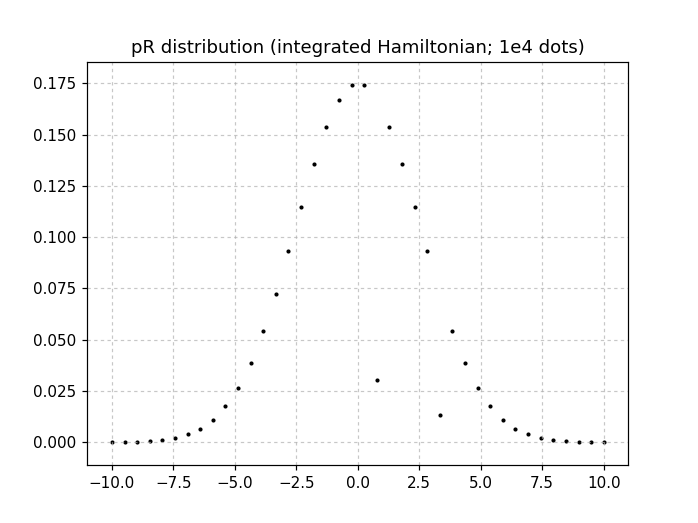

In [31]:
pR_int_1e4, pR_int_1e4_probability = read_file('../data/integrated/pr_10_50000.txt', 2)
plot_one_distribution( pR_int_1e4, pR_int_1e4_probability, 'pR distribution (integrated Hamiltonian; 1e4 dots)')

Читаем файлы с распределениями, полученные методом MCMC. Файлы содержат три колонки -- левая граница "корзинки", правая граница "корзинки" и величина вероятности, отнесенная к это "корзинке" (количество точек, попавшее в нее, отнесенное к общему количеству взятых точек). Для единообразности относим величину вероятности к середине "корзинки". 

Были взяты марковские цепи разной длины -- от 100.000 до 100.000.000. В гистограммы помещаются ВСЕ точки марковские цепи (возможно влияние автокорреляции -- зависимость следующей точки от положения предыдущей). ПОСТРОИТЬ ЦЕПЬ, ИЗ КОТОРОЙ ВЫБИРАЮТСЯ ТОЧКИ ОДНА ИЗ ДЕСЯТИ.

In [8]:
def mean( lbs, ubs ):
    return [ 0.5 * (lb + ub) for lb, ub in zip(lbs, ubs) ]

lbs, ubs, pR_mcmc_1e5_probability = read_file('../data/mcmc/pr_mcmc_1.00e+05_100bins.txt', 3)
pR_mcmc_1e5 = mean( lbs, ubs )
lbs, ubs, pR_mcmc_1e6_probability = read_file('../data/mcmc/pr_mcmc_1.00e+06_100bins.txt', 3)
pR_mcmc_1e6 = mean( lbs, ubs )
lbs, ubs, pR_mcmc_1e7_probability = read_file('../data/mcmc/pr_mcmc_1.00e+07_100bins.txt', 3)
pR_mcmc_1e7 = mean( lbs, ubs )
lbs, ubs, pR_mcmc_1e8_probability = read_file('../data/mcmc/pr_mcmc_1.00e+08_100bins.txt', 3)
pR_mcmc_1e8 = mean( lbs, ubs )

<IPython.core.display.Javascript object>


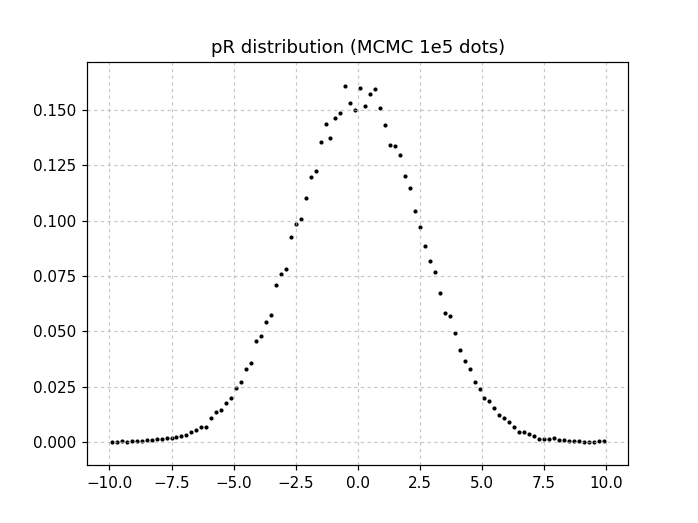

<IPython.core.display.Javascript object>


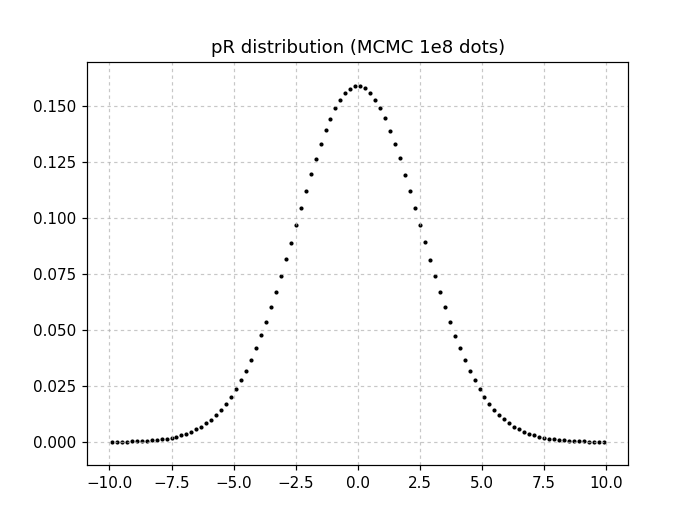

In [9]:
plot_one_distribution( pR_mcmc_1e5, pR_mcmc_1e5_probability, 'pR distribution (MCMC 1e5 dots)')
plot_one_distribution( pR_mcmc_1e8, pR_mcmc_1e8_probability, 'pR distribution (MCMC 1e8 dots)')

Читаем распределения, полученные при помощи генераторов по точным формулам. Для накопления точек, выдаваемых генератором, также использовались гистограмммы. Количество точек, попавших в каждую корзинку (отнесенное к общему числу точек), интерпретируем как вероятность, которую приписываем центру корзинки.

In [20]:
%%latex
\begin{align}
p_R & \sim \mathcal{N} \left( 0, kT \mu \right) \\
J_x & \sim \mathcal{N} \left( 0, kT \mu R^2 \right)
\end{align}

<IPython.core.display.Latex object>

In [10]:
lbs, ubs, pR_exact_1e5_probability = read_file('../data/exact/pr_exact_1.00e+05_100bins.txt', 3)
pR_exact_1e5 = mean( lbs, ubs )
lbs, ubs, pR_exact_1e6_probability = read_file('../data/exact/pr_exact_1.00e+06_100bins.txt', 3)
pR_exact_1e6 = mean( lbs, ubs )
lbs, ubs, pR_exact_1e7_probability = read_file('../data/exact/pr_exact_1.00e+07_100bins.txt', 3)
pR_exact_1e7 = mean( lbs, ubs )
lbs, ubs, pR_exact_1e8_probability = read_file('../data/exact/pr_exact_1.00e+08_100bins.txt', 3)
pR_exact_1e8 = mean( lbs, ubs )

<IPython.core.display.Javascript object>


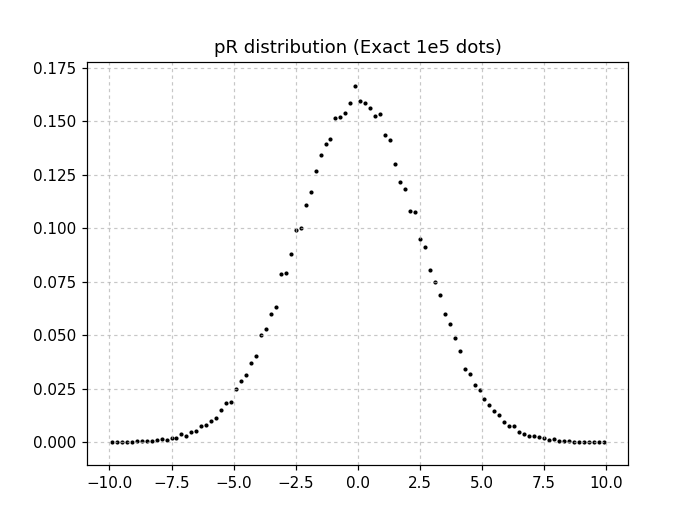

<IPython.core.display.Javascript object>


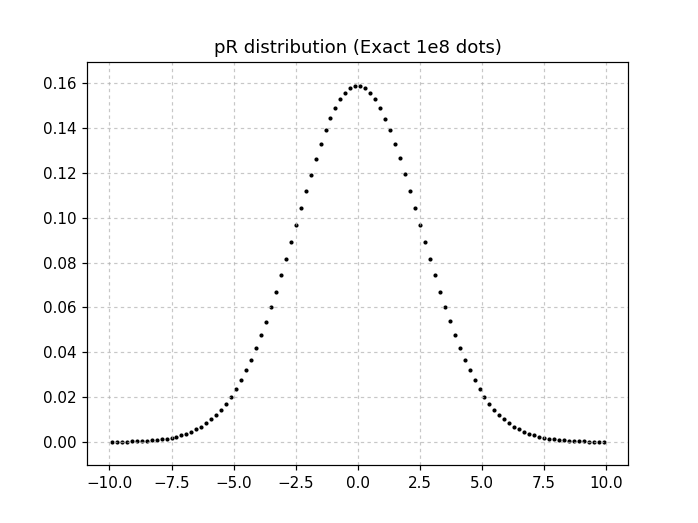

In [21]:
plot_one_distribution( pR_exact_1e5, pR_exact_1e5_probability, 'pR distribution (Exact 1e5 dots)')
plot_one_distribution( pR_exact_1e8, pR_exact_1e8_probability, 'pR distribution (Exact 1e8 dots)')

Сравним распределения, полученные при помощи марковской цепи, с распределениями, полученными при помощи точного генератора.

<IPython.core.display.Javascript object>


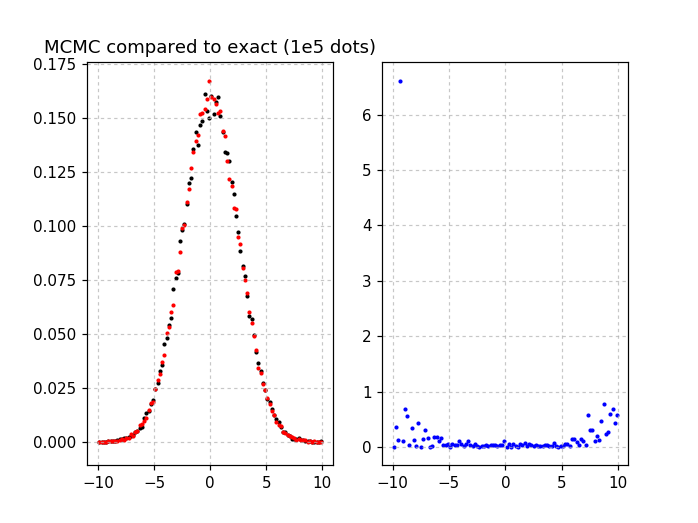

<IPython.core.display.Javascript object>


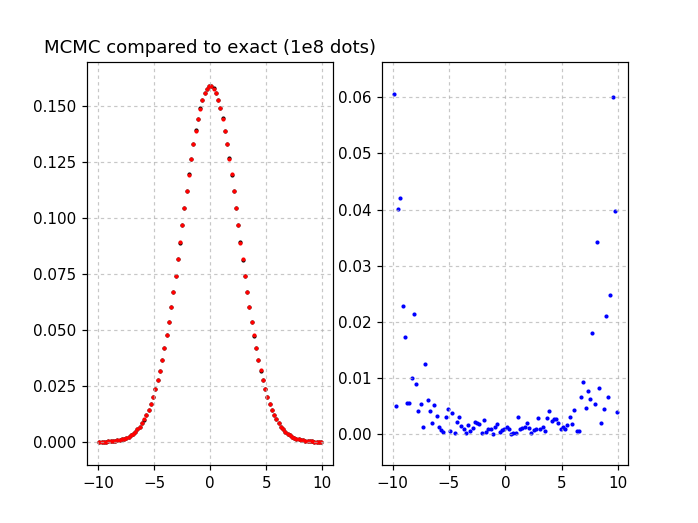

In [29]:
def rel_diff( arr1, arr2 ):
    return [ abs(el1 - el2)/el1 if el1 != 0 else 0 for el1, el2 in zip(arr1, arr2)]
    
def plot_two_distributions_w_difference( values, prob1, prob2, title ):
    
    fig = plt.figure()
    
    plt.subplot(121)
    plt.title(title)
    plt.scatter(values, prob1, color = 'k', s = 3)
    plt.scatter(values, prob2, color = 'r', s = 3)
    plt.grid(linestyle = ':', alpha = 0.7)
    
    plt.subplot(122)
    diff = rel_diff( prob1, prob2 )
    plt.scatter(values, diff, color = 'b', s = 3)
    plt.grid(linestyle = ':', alpha = 0.7)
 
plot_two_distributions_w_difference( pR_mcmc_1e5, pR_mcmc_1e5_probability,
                                     pR_exact_1e5_probability, 'MCMC compared to exact (1e5 dots)')

plot_two_distributions_w_difference( pR_mcmc_1e8, pR_mcmc_1e8_probability,
                                     pR_exact_1e8_probability, 'MCMC compared to exact (1e8 dots)')

Сравним распределения, полученные интегрированием гамильтониана и при помощи марковской цепи.

In [16]:

#plot_two_distributions_w_difference(pR_int_1e4, pR_int_1e4_probability, 
#                                    pR_mcmc_1e5_probability, 'Integrated and MCMC')

Читаем файлы с точными распределениями. В файлах также содержаться границы "корзинок", которые мы усредняем, таким образом вероятность относим к центру "корзинки".

<IPython.core.display.Javascript object>


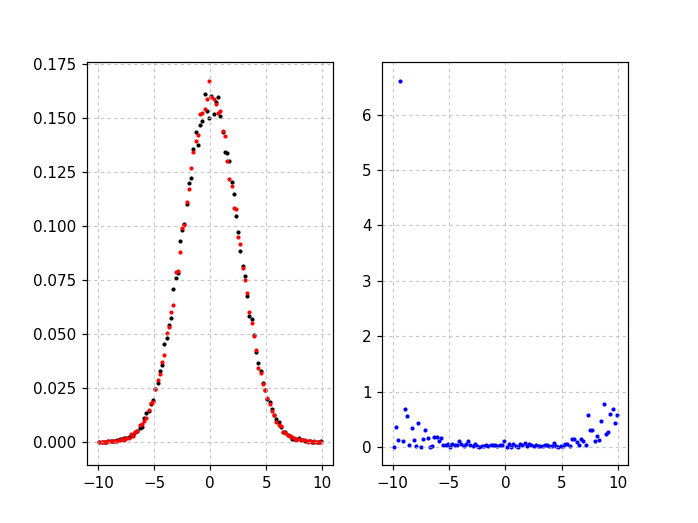

In [19]:
lbs, ubs, pR_exact_1e5_probability = read_file('../data/exact/pr_exact_1.00e+05_100bins.txt', 3)
pR_exact_1e5 = mean(lbs, ubs)

plot_two_distributions_w_difference(pR_exact_1e5, pR_mcmc_1e5_probability, 
                                   pR_exact_1e5_probability, 'Exact (1e5 dots) and MCMC(1e5 dots)')